In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
df = pd.read_pickle("../data/processed/fallas_cerradas_fibra_optica.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2946 entries, 0 to 44
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_ticket                   2946 non-null   object        
 1   categoria                   2946 non-null   category      
 2   subcategoria                2946 non-null   category      
 3   inicio_falla                2946 non-null   datetime64[ns]
 4   cierre_falla                2946 non-null   datetime64[ns]
 5   tiempo_total                2946 non-null   float64       
 6   tg_region                   2946 non-null   category      
 7   direccion                   2946 non-null   object        
 8   abierto_por                 2946 non-null   object        
 9   fecha_asignacion            2946 non-null   datetime64[ns]
 10  equipo_asignado             2946 non-null   category      
 11  grupo_asignado              2946 non-null   category      
 12 

In [183]:
q1 = df['tiempo_total'].quantile(0.25)
q2 = df['tiempo_total'].quantile(0.50)
q3 = df['tiempo_total'].quantile(0.75)

print(f"25% de los tickets fueron resueltos en: {q1:.2f} horas")
print(f"50% de los tickets fueron resueltos en: {q2:.2f} horas")
print(f"75% de los tickets fueron resueltos en: {q3:.2f} horas")

25% de los tickets fueron resueltos en: 6.10 horas
50% de los tickets fueron resueltos en: 8.66 horas
75% de los tickets fueron resueltos en: 12.90 horas


In [184]:
df.describe()

,inicio_falla,cierre_falla,tiempo_total,fecha_asignacion,fin_afectacion,tg_cantidad_dslam,tiempo_de_cierre,tg_cant_clientes_afectados,tg_cantidad_celdas
count,2946,2946,2946.000000,2946,2946,2946.000000,2946,2946.000000,2946.000000
mean,2024-02-16 02:58:02.980651776,2024-02-17 01:03:08.457569280,22.085078,2024-02-16 13:07:18.095723520,2024-02-17 00:23:08.533604864,0.137475,2024-02-16 11:10:08.553971456,17.956551,2.025119
min,2023-01-01 00:02:37,2023-01-01 06:54:45,1.110000,2023-01-01 00:09:17,2023-01-01 06:54:44,0.000000,2023-01-01 00:00:00,0.000000,0.000000
25%,2023-08-13 03:09:18.249999872,2023-08-13 20:41:38.500000,6.102500,2023-08-13 10:41:43.249999872,2023-08-13 19:55:18.750000128,0.000000,2023-08-13 06:00:00,0.000000,0.000000
50%,2024-03-02 04:34:30,2024-03-03 13:01:24.500000,8.665000,2024-03-02 19:15:50.500000,2024-03-03 11:08:40,0.000000,2024-03-03 00:00:00,0.000000,0.000000
75%,2024-08-20 16:46:48.750000128,2024-08-21 08:28:36.249999872,12.897500,2024-08-20 17:41:41.750000128,2024-08-21 08:28:34.750000128,0.000000,2024-08-21 00:00:00,1.000000,1.000000
max,2025-06-12 10:28:14,2025-06-12 16:44:19,5943.680000,2025-06-12 14:33:00,2025-06-12 16:44:18,25.000000,2025-06-12 00:00:00,5000.000000,178.000000
std,NaN,NaN,183.958573,NaN,NaN,0.969014,NaN,159.448147,7.366656


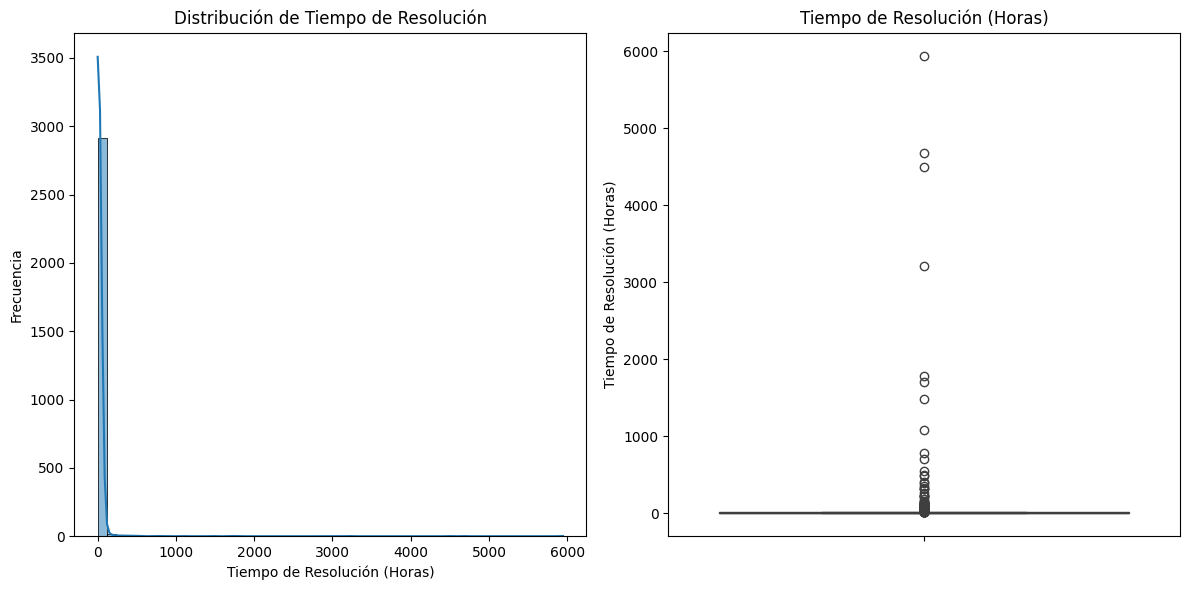

Tiempo de resolución promedio: 22.09 horas
Mediana de tiempo de resolución: 8.66 horas
Desviación estándar: 183.96 horas


In [185]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tiempo_total', bins=50, kde=True)
plt.title('Distribución de Tiempo de Resolución')
plt.xlabel('Tiempo de Resolución (Horas)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='tiempo_total')
plt.title('Tiempo de Resolución (Horas)')
plt.ylabel('Tiempo de Resolución (Horas)')

plt.tight_layout()
plt.show()

print(f"Tiempo de resolución promedio: {df['tiempo_total'].mean():.2f} horas")
print(f"Mediana de tiempo de resolución: {df['tiempo_total'].median():.2f} horas")
print(f"Desviación estándar: {df['tiempo_total'].std():.2f} horas")

In [186]:
print("=== Estadísticas de Tiempo de Resolución ===")
print(f"Min: {df['tiempo_total'].min():.2f} hours")
print(f"Max: {df['tiempo_total'].max():.2f} hours")
print(f"Promedio: {df['tiempo_total'].mean():.2f} horas")
print(f"Mediana: {df['tiempo_total'].median():.2f} horas")
print(f"Desviación estándar: {df['tiempo_total'].std():.2f} horas")
print()

print("=== PERCENTILES ===")
for p in [90, 95, 99, 99.5, 99.9]:
    value = df['tiempo_total'].quantile(p/100)
    print(f"{p}th percentile: {value:.2f} hours")

print()
print("=== Outliers ===")
outliers = df[df['tiempo_total'] > 100]
print(f"Número de Tickets > 100 horas: {len(outliers)}")
if len(outliers) > 0:
    print("Casos extremos:")
    print(outliers[['id_ticket', 'tiempo_total', 'severidad', 'categoria']].head())

print()
print("=== Outliers Extremos > 1000 Horas ===")
extreme = df[df['tiempo_total'] > 1000]
print(f"Número de Tickets > 1000 horas: {len(extreme)}")
if len(extreme) > 0:
    print(extreme[['id_ticket', 'tiempo_total']].head())

=== Estadísticas de Tiempo de Resolución ===
Min: 1.11 hours
Max: 5943.68 hours
Promedio: 22.09 horas
Mediana: 8.66 horas
Desviación estándar: 183.96 horas

=== PERCENTILES ===
90th percentile: 20.33 hours
95th percentile: 28.89 hours
99th percentile: 133.64 hours
99.5th percentile: 371.63 hours
99.9th percentile: 3282.28 hours

=== Outliers ===
Número de Tickets > 100 horas: 37
Casos extremos:
    id_ticket  tiempo_total severidad    categoria
189  F4939576        267.94      Baja        DATOS
418  F5055401        105.27      Baja  TRANSMISION
472  F5075687       1781.85     Media  TRANSMISION
558  F5105526        407.07   Critica        DATOS
586  F5115233        117.28      Baja  TRANSMISION

=== Outliers Extremos > 1000 Horas ===
Número de Tickets > 1000 horas: 8
    id_ticket  tiempo_total
472  F5075687       1781.85
684  F5148855       3211.16
755  F5169141       1707.44
0    F5265748       4675.62
1    F5296274       4504.30


In [187]:
extreme_case = df[df['tiempo_total'] == df['tiempo_total'].max()]
print("=== Caso Extremo ===")
print(extreme_case[['id_ticket', 'inicio_falla', 'cierre_falla', 'tiempo_total']].to_string())
print()

print("=== Análisis de Outliers ===")
thresholds = [48, 72, 168, 720, 1440]

for threshold in thresholds:
    count = len(df[df['tiempo_total'] > threshold])
    pct = (count / len(df)) * 100
    print(f"Tickets > {threshold} horas ({threshold/24:.1f} días): {count} ({pct:.1f}%)")

print()
print("=== RECOMENDACIONES ===")
print("Aproximaciones comunes:")
print("1. Cap at 99th percentile (máximo razonable)")
print("2. Cap at 30 days (720 horas) - límite operativo")
print("3. Eliminar tickets > 30 días como errores de datos")

p99 = df['tiempo_total'].quantile(0.99)
print(f"\n99th percentile: {p99:.2f} horas ({p99/24:.1f} días)")

reasonable_data = df[df['tiempo_total'] <= 720]
print(f"\nCon el filtro de 30 días ({len(reasonable_data)}/{len(df)} tickets):")
print(f"Promedio: {reasonable_data['tiempo_total'].mean():.2f} horas")
print(f"Desviación estándar: {reasonable_data['tiempo_total'].std():.2f} horas")

=== Caso Extremo ===
  id_ticket        inicio_falla        cierre_falla  tiempo_total
2  F5296838 2023-11-18 00:39:07 2024-07-22 16:20:02       5943.68

=== Análisis de Outliers ===
Tickets > 48 horas (2.0 días): 79 (2.7%)
Tickets > 72 horas (3.0 días): 55 (1.9%)
Tickets > 168 horas (7.0 días): 25 (0.8%)
Tickets > 720 horas (30.0 días): 9 (0.3%)
Tickets > 1440 horas (60.0 días): 7 (0.2%)

=== RECOMENDACIONES ===
Aproximaciones comunes:
1. Cap at 99th percentile (máximo razonable)
2. Cap at 30 days (720 horas) - límite operativo
3. Eliminar tickets > 30 días como errores de datos

99th percentile: 133.64 horas (5.6 días)

Con el filtro de 30 días (2937/2946 tickets):
Promedio: 13.58 horas
Desviación estándar: 30.27 horas


In [188]:
threshold = df['tiempo_total'].quantile(0.99)
print(f"99th percentile threshold: {threshold:.2f} hours ({threshold/24:.1f} days)")

df_filtered = df[df['tiempo_total'] <= threshold].copy()
outliers_removed = len(df) - len(df_filtered)

print(f"\nDataset comparison:")
print(f"Original dataset: {len(df):,} tickets")
print(f"Filtered dataset: {len(df_filtered):,} tickets")
print(f"Outliers removed: {outliers_removed} ({outliers_removed/len(df)*100:.1f}%)")

print(f"\nStatistics comparison:")
print("Original data:")
print(f"Promedio: {df['tiempo_total'].mean():.2f} horas")
print(f"Desviación estándar: {df['tiempo_total'].std():.2f} horas")
print(f"Mediana: {df['tiempo_total'].median():.2f} horas")

print("Filtered data (≤99th percentile):")
print(f"Promedio: {df_filtered['tiempo_total'].mean():.2f} horas")
print(f"Desviación estándar: {df_filtered['tiempo_total'].std():.2f} horas")
print(f"Mediana: {df_filtered['tiempo_total'].median():.2f} horas")

# Flag extreme outliers for investigation
extreme_outliers = df[df['tiempo_total'] > threshold]
if len(extreme_outliers) > 0:
    print(f"\nOutliers extremos marcados para investigación:")
    print(extreme_outliers[['id_ticket', 'tiempo_total', 'categoria', 'severidad']])

99th percentile threshold: 133.64 hours (5.6 days)

Dataset comparison:
Original dataset: 2,946 tickets
Filtered dataset: 2,916 tickets
Outliers removed: 30 (1.0%)

Statistics comparison:
Original data:
Promedio: 22.09 horas
Desviación estándar: 183.96 horas
Mediana: 8.66 horas
Filtered data (≤99th percentile):
Promedio: 11.46 horas
Desviación estándar: 11.34 horas
Mediana: 8.59 horas

Outliers extremos marcados para investigación:
     id_ticket  tiempo_total    categoria severidad
189   F4939576        267.94        DATOS      Baja
472   F5075687       1781.85  TRANSMISION     Media
558   F5105526        407.07        DATOS   Critica
588   F5115775        141.41        DATOS   Critica
684   F5148855       3211.16  TRANSMISION      Baja
753   F5168302        482.05        DATOS   Critica
755   F5169141       1707.44  TRANSMISION      Baja
799   F5185708        401.05        DATOS      Alta
894   F5230355        164.20        MOVIL     Media
895   F5230566        550.05    LOGISTICA   

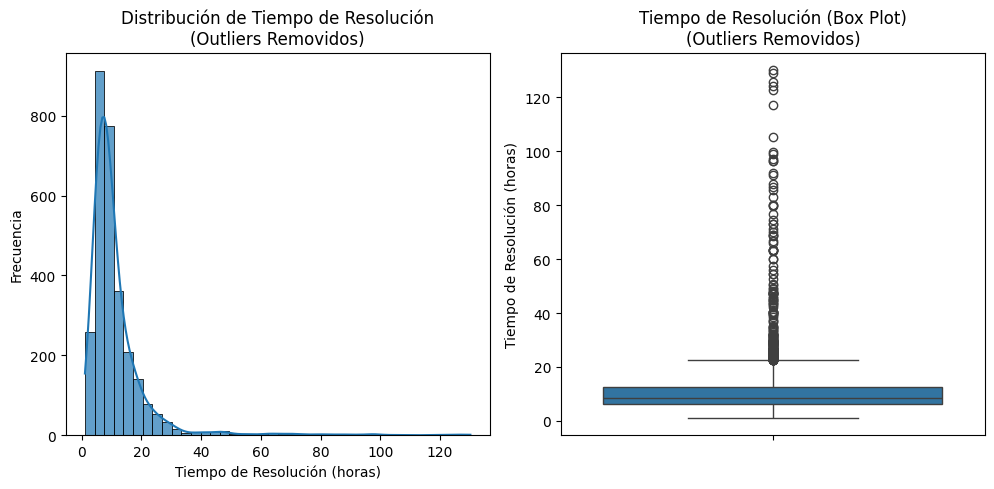

=== RESUMEN DE DATOS LIMPIOS ===
Promedio: 11.46 horas
Mediana: 8.59 horas
Moda: 5.67 horas
Desviación estándar: 11.34 horas
Rango: 1.11 - 130.16 horas


In [189]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df_filtered, x='tiempo_total', bins=40, kde=True, alpha=0.7)
plt.title('Distribución de Tiempo de Resolución\n(Outliers Removidos)')
plt.xlabel('Tiempo de Resolución (horas)')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_filtered, y='tiempo_total')
plt.title('Tiempo de Resolución (Box Plot)\n(Outliers Removidos)')
plt.ylabel('Tiempo de Resolución (horas)')

plt.tight_layout()
plt.show()

print("=== RESUMEN DE DATOS LIMPIOS ===")
print(f"Promedio: {df_filtered['tiempo_total'].mean():.2f} horas")
print(f"Mediana: {df_filtered['tiempo_total'].median():.2f} horas")
print(f"Moda: {df_filtered['tiempo_total'].mode().iloc[0]:.2f} horas")
print(f"Desviación estándar: {df_filtered['tiempo_total'].std():.2f} horas")
print(f"Rango: {df_filtered['tiempo_total'].min():.2f} - {df_filtered['tiempo_total'].max():.2f} horas")

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/2385498490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette="Set2", order=categoria_counts.index)


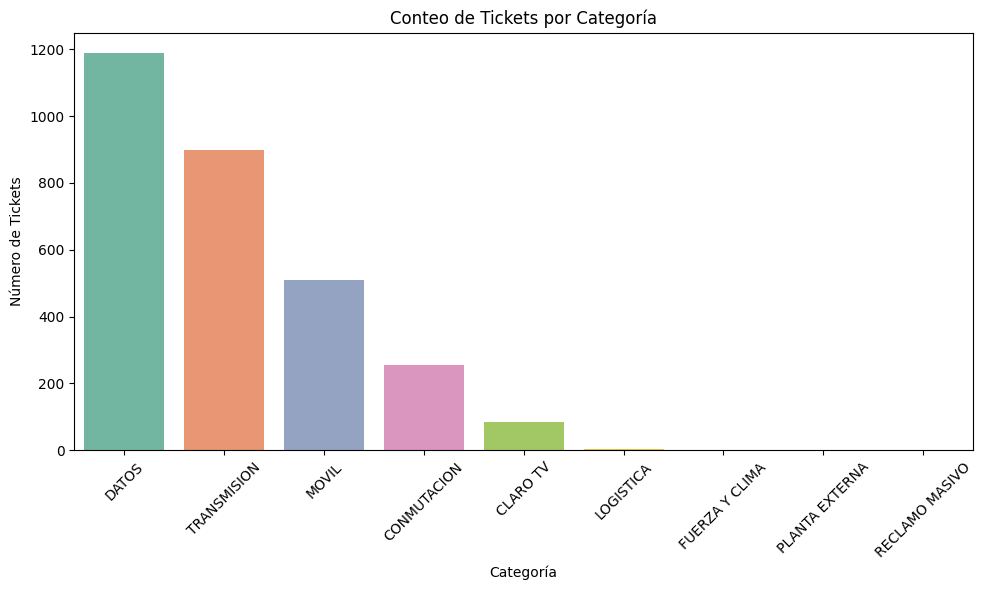

Conteo de Tickets por Categoría:
DATOS: 1,190 tickets (40.4%)
TRANSMISION: 900 tickets (30.5%)
MOVIL: 509 tickets (17.3%)
CONMUTACION: 254 tickets (8.6%)
CLARO TV: 86 tickets (2.9%)
LOGISTICA: 3 tickets (0.1%)
FUERZA Y CLIMA: 2 tickets (0.1%)
PLANTA EXTERNA: 1 tickets (0.0%)
RECLAMO MASIVO: 1 tickets (0.0%)


In [190]:
plt.figure(figsize=(10, 6))
categoria_counts = df['categoria'].value_counts()
sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette="Set2", order=categoria_counts.index)
plt.title('Conteo de Tickets por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("Conteo de Tickets por Categoría:")
for cat, count in categoria_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{cat}: {count:,} tickets ({percentage:.1f}%)")

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/1739985881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_counts.index, x=region_counts.values, palette="viridis", order=region_counts.index)


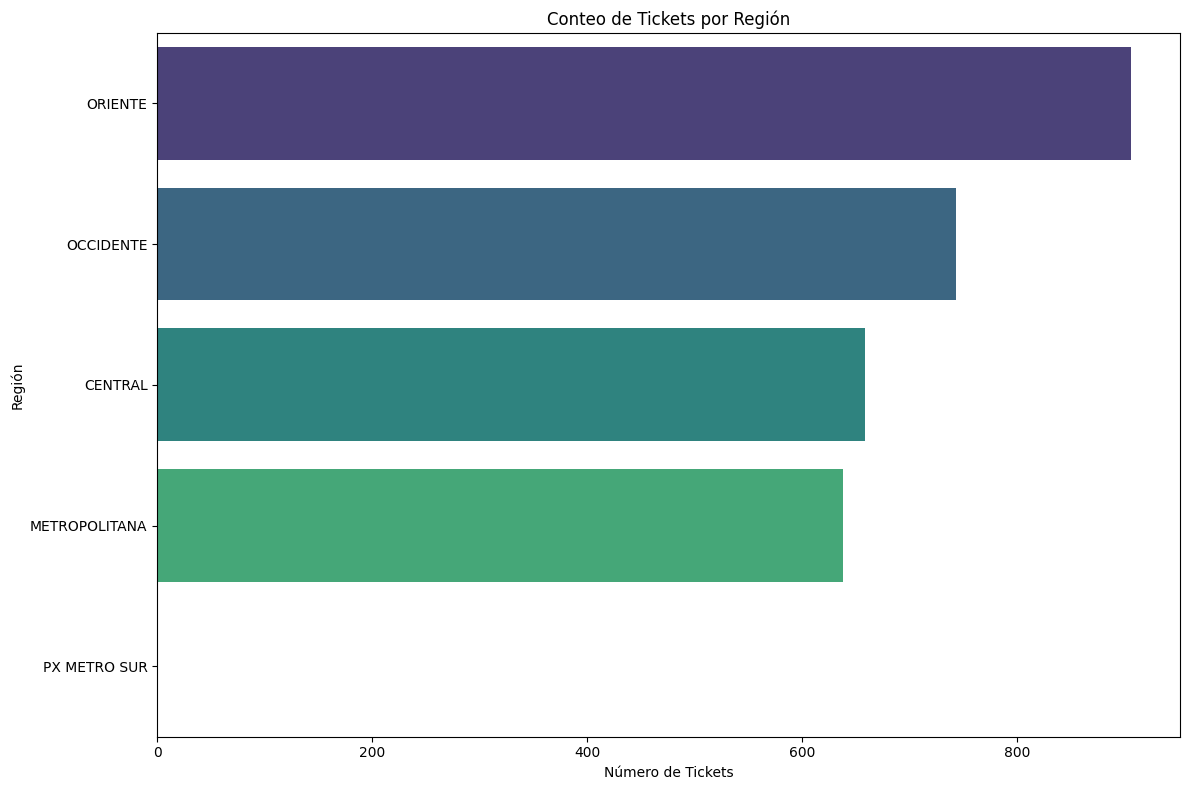

Conteo de Tickets por Región:
ORIENTE: 906 tickets (30.8%)
OCCIDENTE: 743 tickets (25.2%)
CENTRAL: 658 tickets (22.3%)
METROPOLITANA: 638 tickets (21.7%)
PX METRO SUR: 1 tickets (0.0%)


In [191]:
plt.figure(figsize=(12, 8))
region_counts = df['tg_region'].value_counts()
sns.barplot(y=region_counts.index, x=region_counts.values, palette="viridis", order=region_counts.index)
plt.title('Conteo de Tickets por Región')
plt.xlabel('Número de Tickets')
plt.ylabel('Región')
plt.tight_layout()
plt.show()

print("Conteo de Tickets por Región:")
for region, count in region_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{region}: {count:,} tickets ({percentage:.1f}%)")

Text(0.5, 1.0, 'Distribución de Tickets por Severidad')

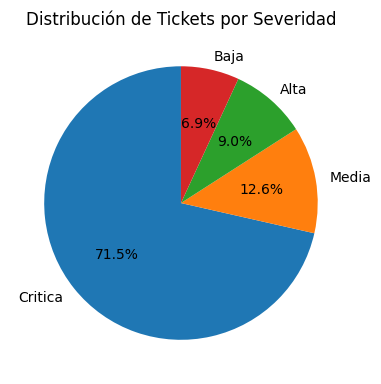

In [192]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 1)
severidad_counts = df['severidad'].value_counts()
plt.pie(severidad_counts.values, labels=severidad_counts.index, 
autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Tickets por Severidad')


/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/3942080303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_groups.index, x=top_groups.values, palette="Set3", order=top_groups.index)


Text(0, 0.5, 'Grupo de Resolución')

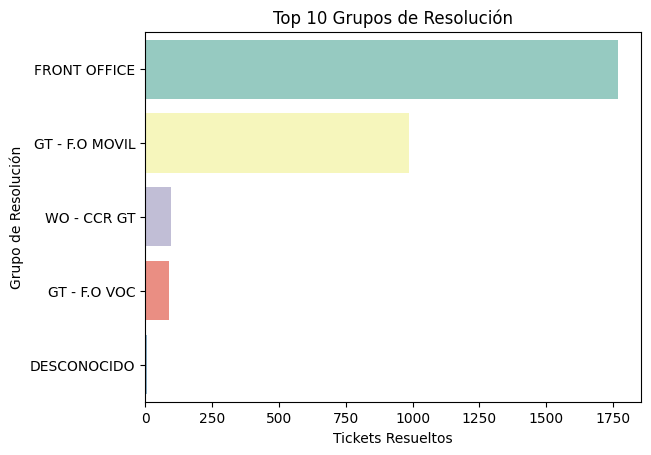

In [193]:
top_groups = df['grupo_que_resolvio'].value_counts().head(10)
sns.barplot(y=top_groups.index, x=top_groups.values, palette="Set3", order=top_groups.index)
plt.title('Top 10 Grupos de Resolución')
plt.xlabel('Tickets Resueltos')
plt.ylabel('Grupo de Resolución')

Text(0, 0.5, 'Número de Tickets')

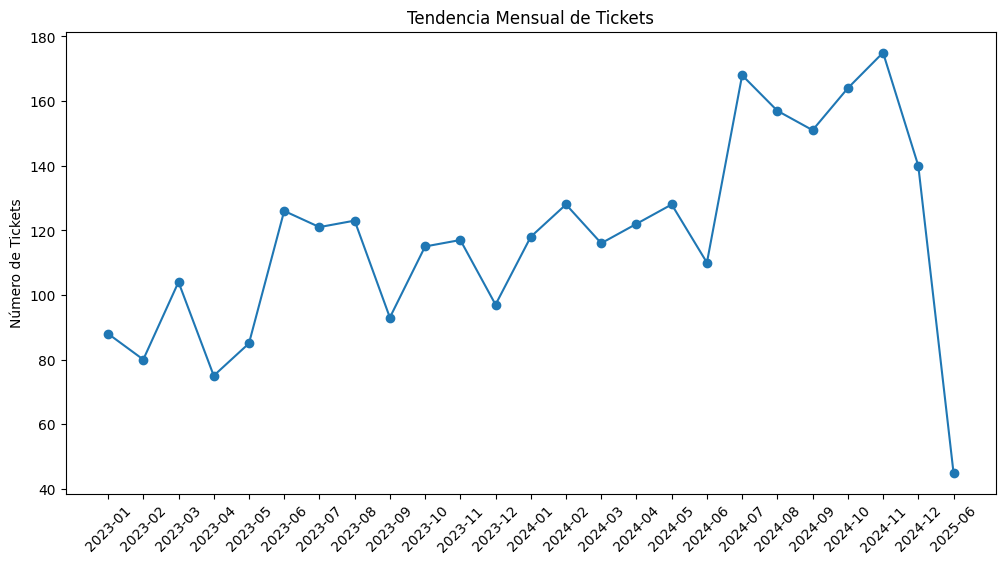

In [194]:
plt.figure(figsize=(12, 6))
df['month'] = df['inicio_falla'].dt.to_period('M')
monthly_counts = df.groupby('month').size()
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o')
plt.title('Tendencia Mensual de Tickets')
plt.xticks(rotation=45)
plt.ylabel('Número de Tickets')

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/1892775833.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_filtered.pivot_table(
/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/1892775833.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  count_data = df.pivot_table(
/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/1892775833.py:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sev_cat_data = df.pivot_table(
/var/folders/kr/8nx03y

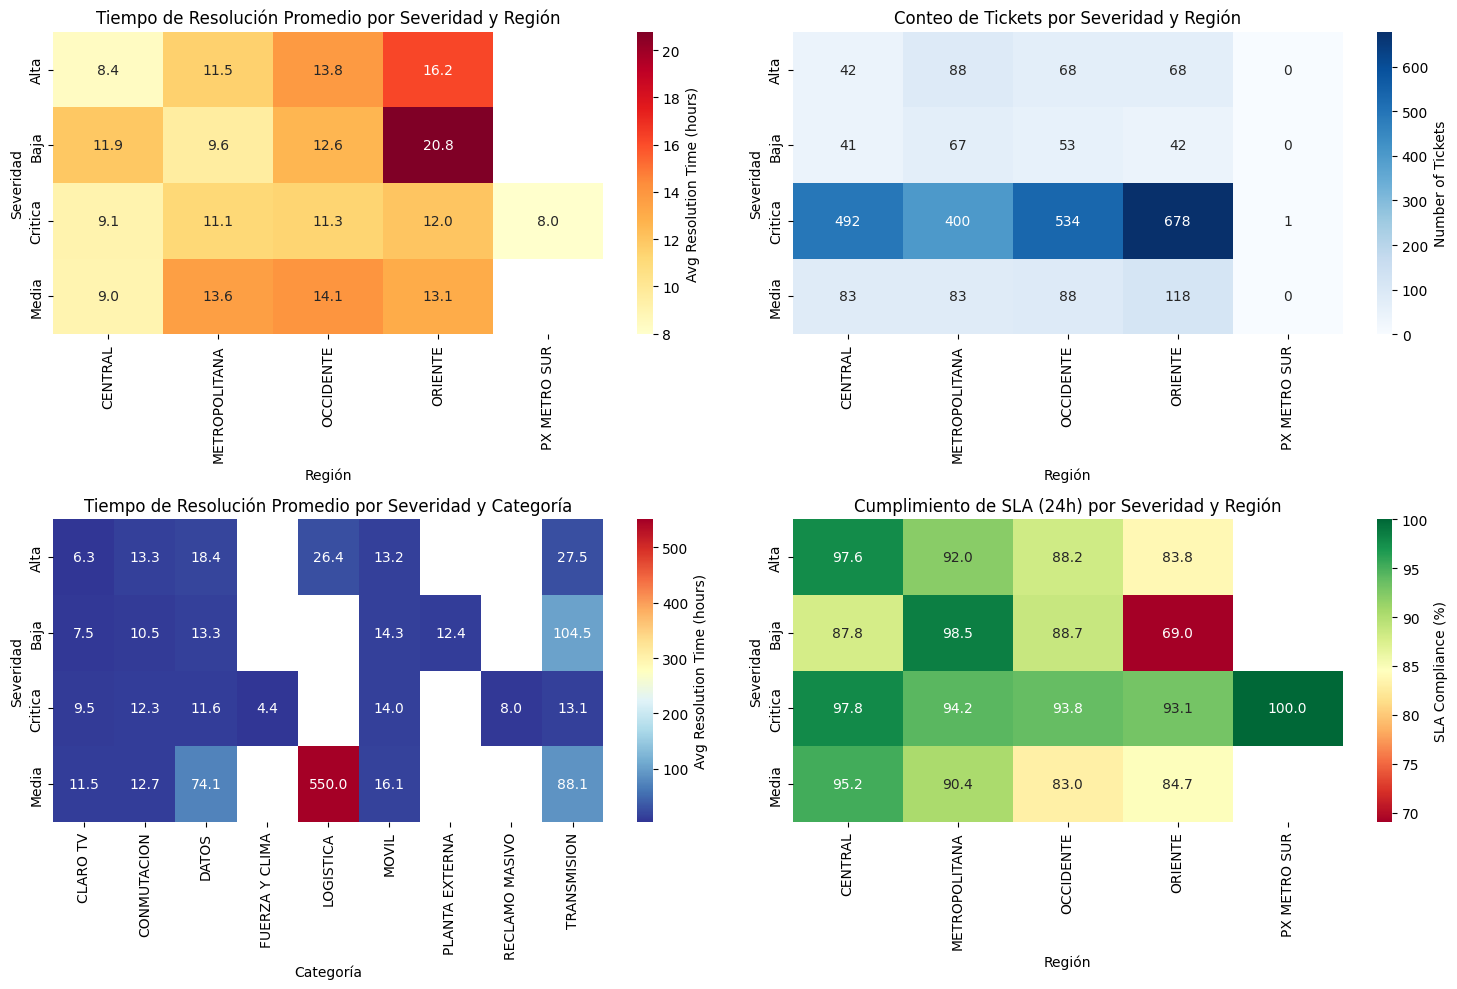

=== ANÁLISIS DE SEVERIDAD ===

Tiempo de Resolución Promedio por Severidad:
Alta: 12.79h avg, 8.84h median (264 tickets)
Baja: 12.97h avg, 8.65h median (196 tickets)
Critica: 10.97h avg, 8.54h median (2096 tickets)
Media: 12.49h avg, 8.78h median (360 tickets)

Cumplimiento de SLA por Severidad (% dentro de 24h):
Alta: 89.8%
Baja: 87.7%
Critica: 94.6%
Media: 87.9%


/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/1892775833.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_stats = df_filtered.groupby('severidad')['tiempo_total'].agg(['mean', 'median','count'])
/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/1892775833.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sla_by_severity = df.groupby('severidad').apply(lambda x:(x['tiempo_total'] <= 24).mean() * 100)
/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/1892775833.py:67: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This beh

In [195]:
plt.figure(figsize=(15, 10))

heatmap_data = df_filtered.pivot_table(
    values='tiempo_total',
    index='severidad',
    columns='tg_region',
    aggfunc='mean'
)

plt.subplot(2, 2, 1)
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd',
            cbar_kws={'label': 'Avg Resolution Time (hours)'})
plt.title('Tiempo de Resolución Promedio por Severidad y Región')
plt.ylabel('Severidad')
plt.xlabel('Región')

plt.subplot(2, 2, 2)
count_data = df.pivot_table(
    values='id_ticket',
    index='severidad',
    columns='tg_region',
    aggfunc='count'
)
sns.heatmap(count_data, annot=True, fmt='d', cmap='Blues',
            cbar_kws={'label': 'Number of Tickets'})
plt.title('Conteo de Tickets por Severidad y Región')
plt.ylabel('Severidad')
plt.xlabel('Región')

plt.subplot(2, 2, 3)
sev_cat_data = df.pivot_table(
    values='tiempo_total',
    index='severidad',
    columns='categoria',
    aggfunc='mean'
)
sns.heatmap(sev_cat_data, annot=True, fmt='.1f', cmap='RdYlBu_r',
            cbar_kws={'label': 'Avg Resolution Time (hours)'})
plt.title('Tiempo de Resolución Promedio por Severidad y Categoría')
plt.ylabel('Severidad')
plt.xlabel('Categoría')

# Subplot 4: SLA Compliance Heatmap (% within 24h)
plt.subplot(2, 2, 4)
sla_data = df.groupby(['severidad', 'tg_region']).apply(
    lambda x: (x['tiempo_total'] <= 24).mean() * 100
).unstack()
sns.heatmap(sla_data, annot=True, fmt='.1f', cmap='RdYlGn',
            cbar_kws={'label': 'SLA Compliance (%)'})
plt.title('Cumplimiento de SLA (24h) por Severidad y Región')
plt.ylabel('Severidad')
plt.xlabel('Región')

plt.tight_layout()
plt.show()

print("=== ANÁLISIS DE SEVERIDAD ===")
print("\nTiempo de Resolución Promedio por Severidad:")
severity_stats = df_filtered.groupby('severidad')['tiempo_total'].agg(['mean', 'median','count'])
for severity in severity_stats.index:
    mean_time = severity_stats.loc[severity, 'mean']
    median_time = severity_stats.loc[severity, 'median']
    count = severity_stats.loc[severity, 'count']
    print(f"{severity}: {mean_time:.2f}h avg, {median_time:.2f}h median ({count} tickets)")

print("\nCumplimiento de SLA por Severidad (% dentro de 24h):")
sla_by_severity = df.groupby('severidad').apply(lambda x:(x['tiempo_total'] <= 24).mean() * 100)
for severity, compliance in sla_by_severity.items():
    print(f"{severity}: {compliance:.1f}%")

In [196]:
df['month'] = df['inicio_falla'].dt.to_period('M')
df['week'] = df['inicio_falla'].dt.to_period('W')
df['day_of_week'] = df['inicio_falla'].dt.day_name()
df['hour'] = df['inicio_falla'].dt.hour

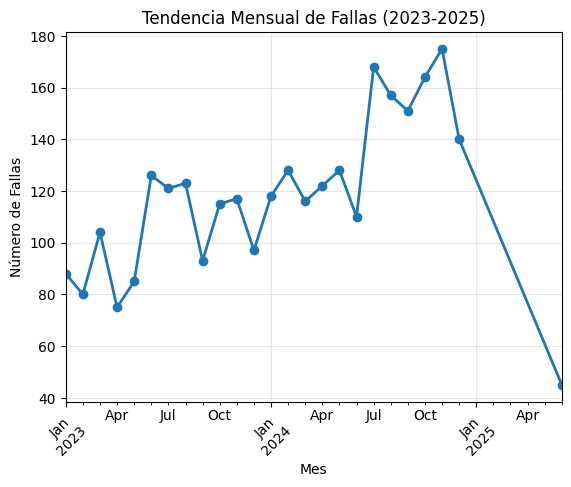

In [197]:
monthly_counts = df.groupby('month').size()
monthly_counts.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Tendencia Mensual de Fallas (2023-2025)')
plt.xlabel('Mes')
plt.ylabel('Número de Fallas')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/629708051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_counts.index, y=dow_counts.values, palette='viridis')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

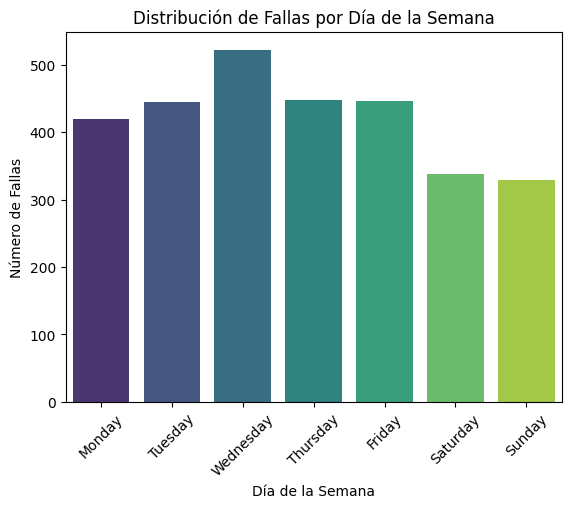

In [198]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['day_of_week'].value_counts().reindex(day_order)
sns.barplot(x=dow_counts.index, y=dow_counts.values, palette='viridis')
plt.title('Distribución de Fallas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Fallas')
plt.xticks(rotation=45)

(0.0, 23.0)

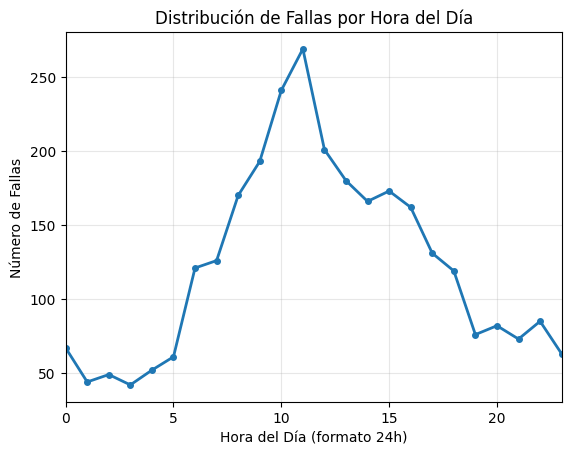

In [199]:
hourly_counts = df['hour'].value_counts().sort_index()
plt.plot(hourly_counts.index, hourly_counts.values, marker='o',
linewidth=2, markersize=4)
plt.title('Distribución de Fallas por Hora del Día')
plt.xlabel('Hora del Día (formato 24h)')
plt.ylabel('Número de Fallas')
plt.grid(True, alpha=0.3)
plt.xlim(0, 23)

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/3956806269.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_by_category = df.groupby(['month', 'categoria']).size().unstack()


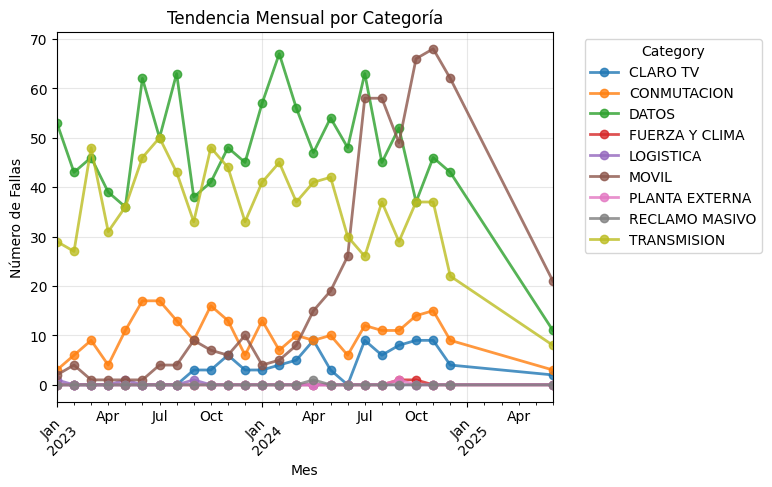

In [200]:
monthly_by_category = df.groupby(['month', 'categoria']).size().unstack()
monthly_by_category.plot(kind='line', marker='o', linewidth=2, alpha=0.8)
plt.title('Tendencia Mensual por Categoría')
plt.xlabel('Mes')
plt.ylabel('Número de Fallas')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_35680/1750747897.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_by_region = df.groupby(['month', 'tg_region']).size().unstack()


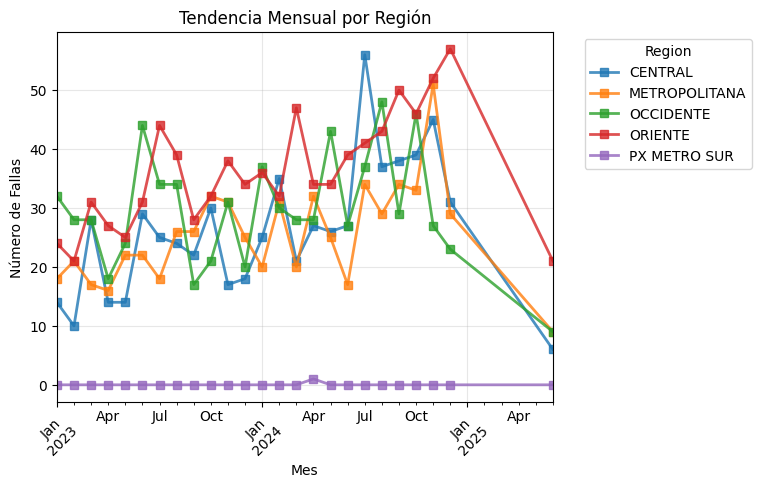

In [201]:
monthly_by_region = df.groupby(['month', 'tg_region']).size().unstack()
monthly_by_region.plot(kind='line', marker='s', linewidth=2, alpha=0.8)
plt.title('Tendencia Mensual por Región')
plt.xlabel('Mes')
plt.ylabel('Número de Fallas')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

In [202]:
print("\nEstadísticas Mensuales:")
print(f"Promedio de fallas por mes: {monthly_counts.mean():.1f}")
print(f"Mes con más fallas: {monthly_counts.idxmax()} ({monthly_counts.max()} fallas)")
print(f"Mes con menos fallas: {monthly_counts.idxmin()} ({monthly_counts.min()} fallas)")

print("\nPatrones de Día de la Semana:")
for day, count in dow_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{day}: {count} faults ({percentage:.1f}%)")

print("\nAnálisis de Horas Pico:")
top_hours = hourly_counts.nlargest(3)
for hour, count in top_hours.items():
    print(f"{hour:02d}:00 - {count} faults")

print(f"\nHoras Quietas (3 más bajas):")
quiet_hours = hourly_counts.nsmallest(3)
for hour, count in quiet_hours.items():
    print(f"{hour:02d}:00 - {count} faults")

# Seasonal analysis
print("\nPatrones Estacionales:")
df['season'] = df['inicio_falla'].dt.month.map({
    12: 'Invierno', 1: 'Invierno', 2: 'Invierno',
    3: 'Primavera', 4: 'Primavera', 5: 'Primavera',
    6: 'Verano', 7: 'Verano', 8: 'Verano',
    9: 'Otoño', 10: 'Otoño', 11: 'Otoño'
})
seasonal_counts = df['season'].value_counts()
for season, count in seasonal_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{season}: {count} faults ({percentage:.1f}%)")


Estadísticas Mensuales:
Promedio de fallas por mes: 117.8
Mes con más fallas: 2024-11 (175 fallas)
Mes con menos fallas: 2025-06 (45 fallas)

Patrones de Día de la Semana:
Monday: 419 faults (14.2%)
Tuesday: 445 faults (15.1%)
Wednesday: 522 faults (17.7%)
Thursday: 447 faults (15.2%)
Friday: 446 faults (15.1%)
Saturday: 338 faults (11.5%)
Sunday: 329 faults (11.2%)

Análisis de Horas Pico:
11:00 - 269 faults
10:00 - 241 faults
12:00 - 201 faults

Horas Quietas (3 más bajas):
03:00 - 42 faults
01:00 - 44 faults
02:00 - 49 faults

Patrones Estacionales:
Verano: 850 faults (28.9%)
Otoño: 815 faults (27.7%)
Invierno: 651 faults (22.1%)
Primavera: 630 faults (21.4%)
